In [ ]:
#Importing all the necessary libraries such as pandas and numpy to perform the data operations and imported matplotlib and seaborn to visualize and to ignore the warnings I have imported warnings
import pandas as pan
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as num
import seaborn as sb


#From sk.learn I have imported train_test_split to spit the data into train data and test data
from sklearn.model_selection import train_test_split, GridSearchCV
#From sk.learn I have imported accuracy_score to caluculate the accuracy of the model
from sklearn.metrics import accuracy_score
#From sk.learn I have imported LabelEncoder to covert strings into numeric data
from sklearn.preprocessing import LabelEncoder
#From sk.learn I have imported for Scaling
from sklearn.preprocessing import StandardScaler
#From sk.learn I have imported Confusion Matrix to the relation TN,TP,FN,FP
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
#From sk.learn I have imported RandomForestClassifier to implement the on the data 
from sklearn.ensemble import RandomForestClassifier
#From sk.learn I have imported to extract the Classification Report
from sklearn.metrics import classification_report
#From sk.learn I have imported to perform KFold
from sklearn.model_selection import KFold
#From sk.learn I have imported cross_val_score to caluculate the cross_val score
from sklearn.model_selection import cross_val_score
#From sk.learn I have imported cross_val_predict to caluculate cross_val score on the test data
from sklearn.model_selection import cross_val_predict

In [ ]:
# I have loaded the data using the read.csv
raw_data=pan.read_csv("insurance.csv")
#Using show the initial 10 rows I have used the head
raw_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [ ]:
print(" Number of null values in the data set:{} ".format(raw_data.isnull().sum()))

 Number of null values in the data set:age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64 


In [ ]:
raw_data.head(10)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Text(0.5, 1.0, 'Distribution of Charges')

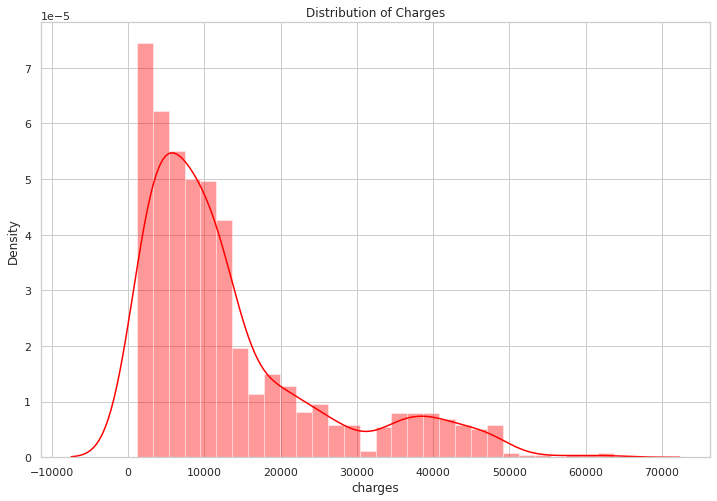

In [ ]:
sb.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sb.distplot(raw_data['charges'], kde = True, color = 'red')
plt.title('Distribution of Charges')

#This distribution is right-skewed. To make it closer to normal we can apply natural log

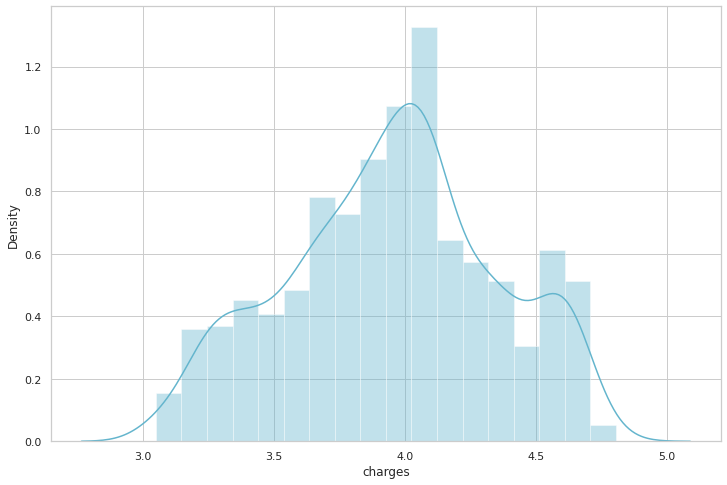

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sb.distplot(num.log10(raw_data['charges']), kde = True, color = 'c' )

#Charges by region

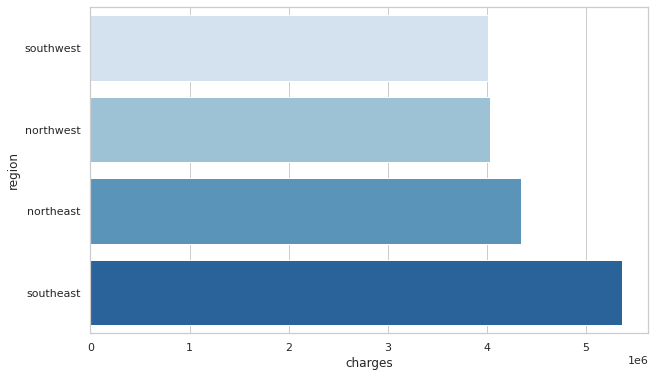

In [ ]:
charges = raw_data['charges'].groupby(raw_data.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(10, 6))
ax = sb.barplot(charges.head(), charges.head().index, palette='Blues')

#So overall the highest medical charges are in the Southeast and the lowest are in the Southwest. Taking into account certain factors (sex, smoking, having children) let's see how it changes by region

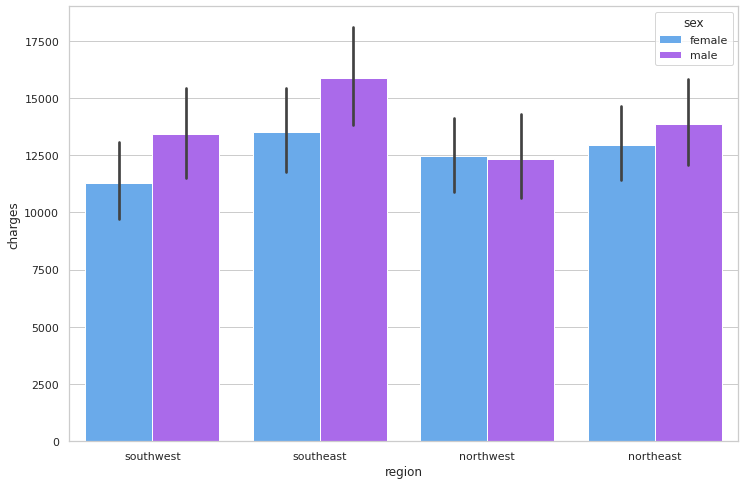

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sb.barplot(x='region', y='charges', hue='sex', data=raw_data, palette='cool')

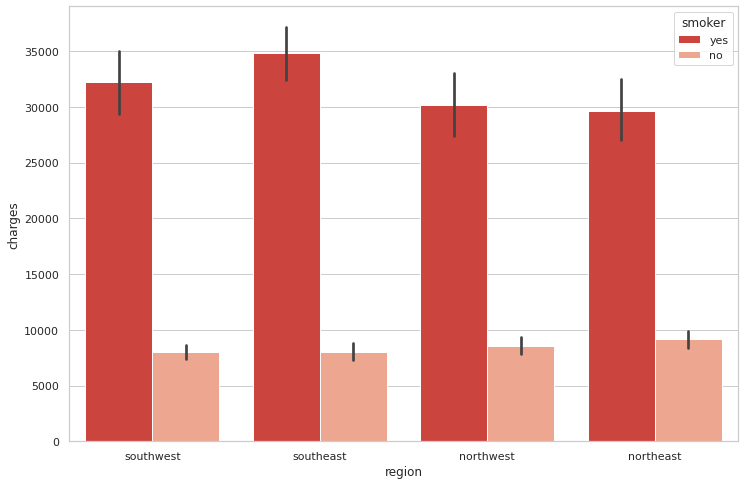

In [ ]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sb.barplot(x = 'region', y = 'charges',
                 hue='smoker', data = raw_data, palette='Reds_r')

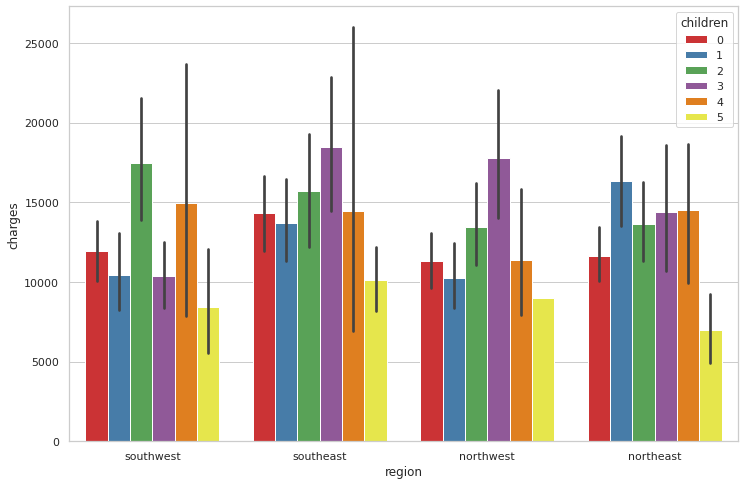

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sb.barplot(x='region', y='charges', hue='children', data=raw_data, palette='Set1')

#As we can see from these barplots the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. And people with children tend to have higher medical costs overall as well



Now let's analyze the medical charges by age, bmi and children according to the smoking factor

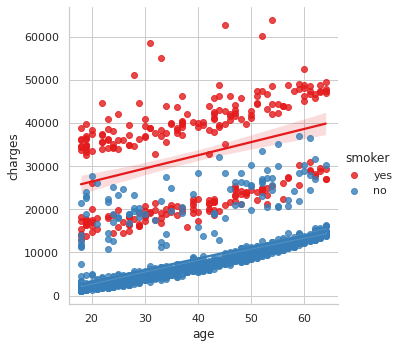

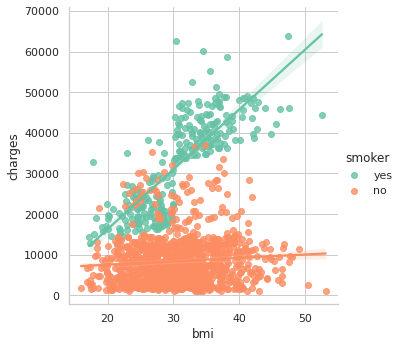

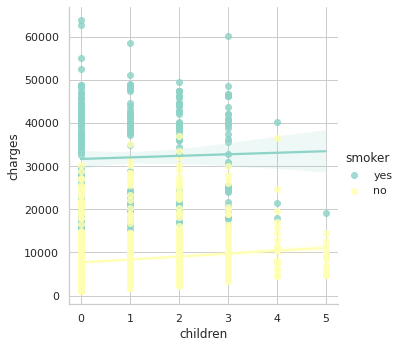

In [ ]:
ax = sb.lmplot(x = 'age', y = 'charges', data=raw_data, hue='smoker', palette='Set1')
ax = sb.lmplot(x = 'bmi', y = 'charges', data=raw_data, hue='smoker', palette='Set2')
ax = sb.lmplot(x = 'children', y = 'charges', data=raw_data, hue='smoker', palette='Set3')

Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children. Also people who have children generally smoke less, which the following violinplots shows too

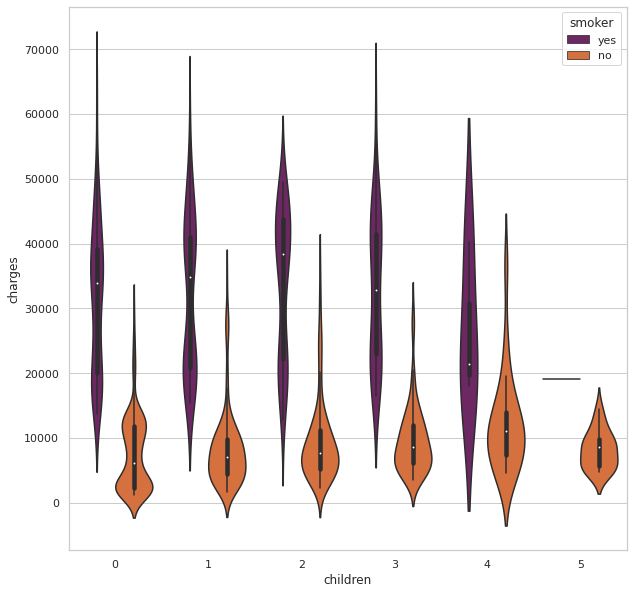

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sb.violinplot(x = 'children', y = 'charges', data=raw_data,
                 orient='v', hue='smoker', palette='inferno')

In [ ]:
#Converting objects labels into categorical
raw_data[['sex', 'smoker', 'region']] = raw_data[['sex', 'smoker', 'region']].astype('category')
raw_data.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [ ]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(raw_data.sex.drop_duplicates())
raw_data.sex = label.transform(raw_data.sex)
label.fit(raw_data.smoker.drop_duplicates())
raw_data.smoker = label.transform(raw_data.smoker)
label.fit(raw_data.region.drop_duplicates())
raw_data.region = label.transform(raw_data.region)
raw_data.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

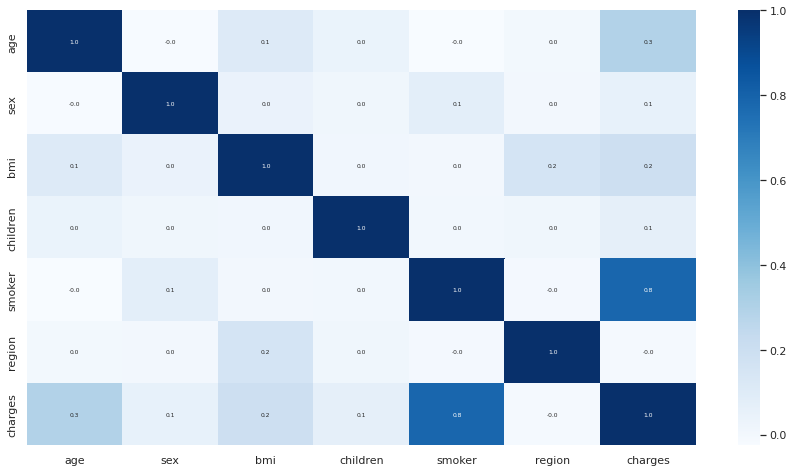

In [ ]:
plt.figure(figsize=(15,8))
#And the figure shows that the darker the color the stronger the relationship and vise versa i.e. lighter the color weaker the relationship
sb.heatmap(raw_data.corr(), fmt='.1f', annot=True, annot_kws={'size':6}, cmap='Blues')
#And in the map we need  to ignore all the diagnol elements as they are same
plt.show()

#BUilding Linear regression model

In [ ]:
df = raw_data

In [ ]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=42)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-11946.606567263045
[ 2.57056264e+02 -1.87914567e+01  3.35781491e+02  4.25091456e+02
  2.36478181e+04 -2.71284266e+02]
0.7833463107364539


In [ ]:
Lin_reg.fit(x_train,y_train)
x_train_pred = Lin_reg.predict(x_train)
x_test_pred = Lin_reg.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (metrics.mean_squared_error(x_train_pred, y_train),metrics.mean_squared_error(x_test_pred, y_test)))
print('RSE train data: %.3f, R2 test data: %.3f' % (metrics.r2_score(y_train,x_train_pred),metrics.r2_score(y_test,x_test_pred)))

MSE train data: 37280663.223, MSE test data: 33635210.431
RSE train data: 0.742, R2 test data: 0.783


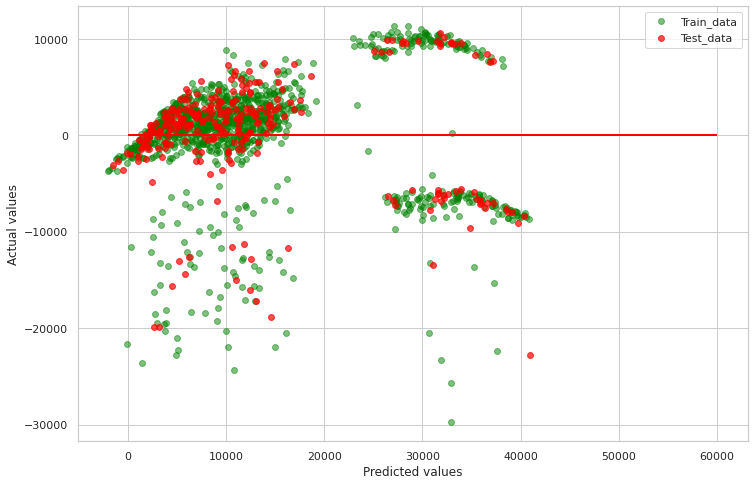

In [ ]:
plt.figure(figsize=(12,8))

plt.scatter(x_train_pred, x_train_pred - y_train,c = 'green', marker = 'o', s = 35, alpha = 0.5,label = 'Train_data')
plt.scatter(x_test_pred, x_test_pred - y_test,c = 'red', marker = 'o', s = 35, alpha = 0.7,label = 'Test_data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')

In [ ]:
from sklearn.ensemble import RandomForestRegressor as rfr
x = df.drop(['charges'], axis=1)
y = df.charges
Rfr = rfr(n_estimators = 100, criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
Rfr.fit(x_train,y_train)
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

Feature importance ranking


1.smoker(0.613612)
2.bmi(0.210955)
3.age(0.133179)
4.children(0.020640)
5.region(0.014351)
6.sex(0.007263)


<BarContainer object of 6 artists>

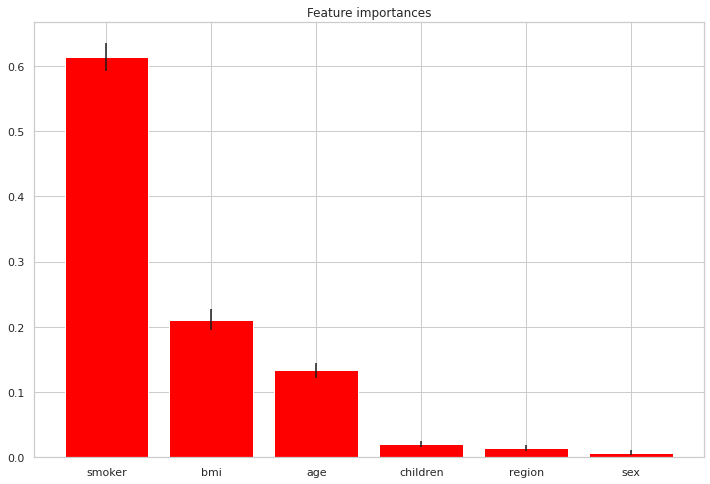

In [ ]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = num.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = num.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],color="red", yerr=std[indices], align="center")